In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = 2 * np.random.random(size=100) # 产生100个随机数
y = x * 3. + 4. + np.random.normal(size=100) #

In [3]:
X = x.reshape(-1, 1) # 有一列，行数自适应。这里应该是100行

In [4]:
X.shape

(100, 1)

In [5]:
y.shape

(100,)

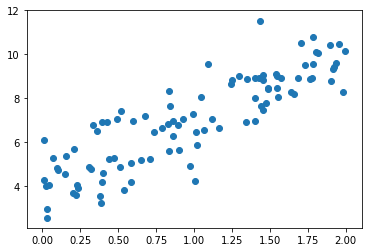

In [6]:
plt.scatter(x, y)
plt.show()

# 使用梯度下降法训练
> 这列的m是指样本的数量；n是指变量的个数(x1,x2,x3等)

![梯度下降法.png](https://i.loli.net/2018/10/07/5bb9eb3986d42.png)


In [7]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float("inf")

In [8]:
def dJ(theta, X_b, y):
    result = np.empty(len(theta))
    result[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        result[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
    return result * 2 / len(X_b)

In [9]:
def gradient_descent(X_b, y, initial_theta,eta, epsilon=1e-8, max_iters=10000): # max_iters:最大循环次数
    theta = initial_theta
    for i in range(0,max_iters):
        gradient = dJ(theta, X_b, y)
        last_theta = theta 
        theta = theta - eta * gradient

        # 比较差值是否越来越小.当变换接近于最小经度时，已经可以人为到达导数为0的点了
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
    return theta

In [10]:
X_b = np.hstack([np.ones((len(X), 1)), X.reshape(-1, 1)]) # 沿着X的方向进行堆叠，添加一列，行数为样本个数(m)
initial_theta = np.zeros(X_b.shape[1]) # X的的参数为theta，因为多个样本组成n*m的矩阵，所以初始化theta数组的长度为n，即列数
eta = 0.01
theta = gradient_descent(X_b, y, initial_theta, eta)

In [11]:
theta

array([ 4.02145786,  3.00706277])

## 测试封装的线性回归算法(playML)

In [12]:
from playML.LinearRegression import LinearRegression

In [14]:
lin_reg = LinearRegression() # 创建线性回归训练器

In [15]:
lin_reg.fit_gd(X, y)

LinearRegression()

In [17]:
lin_reg.coef_ # 斜率

array([ 3.00706277])

In [18]:
lin_reg.intercept_ # 截距

4.021457858204859